In [1]:
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
np.random.seed(1)
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def data_generation(n=1000):
    a = 3. * np.pi * np.random.rand(n)
    x = np.stack(
        [a * np.cos(a), 30. * np.random.random(n), a * np.sin(a)], axis=1)
    return a, x

In [3]:
def get_nnmat(x, k=10):
    W = []
    for x_i in x:
        threshold = np.array([np.dot(x_i - x_j, x_i - x_j) for x_j in x]).argsort()[:k]
        knn_list = list(map(lambda x : x in threshold, np.arange(x.shape[0])))
        W.append(knn_list)
    W = np.array(W)
    W = np.where(np.logical_or(W, W.T), 1, 0)
    return W

In [4]:
def LapEig(x, d=2):
    
    W = get_nnmat(x)
    D = np.diag(W.sum(axis=1))
    L = D - W
    w, v =  scipy.linalg.eigh(L, D)
    
    #sorting
    ind = np.argsort(w)
    w = w[ind]
    v = v.T[ind]
    
    return v[1:d+1].T

In [5]:
def visualize(x, z, a):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=a, marker='o')
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(z[:, 0], z[:, 1], c=a, marker='o')

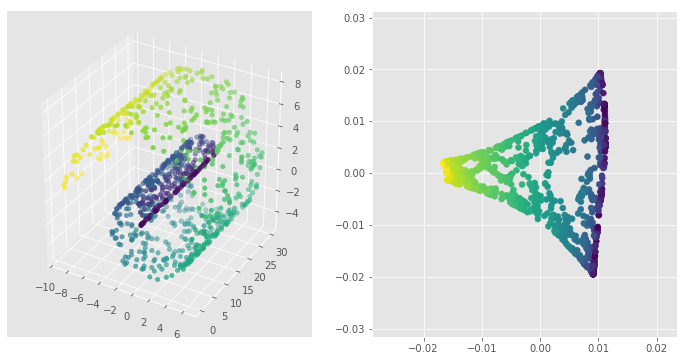

In [6]:
n = 1000
a, x = data_generation(n)
z = LapEig(x)
visualize(x, z, a)